In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from astropy.io.votable import parse_single_table

In [2]:
#GOODS SOUTH STAR CHART within 100 arcmin; downloaded using ASQL from GAIA DR3
table = parse_single_table("CANDLES2")
CANDLES=table.array

ra=[] #Right Ascension
dec=[] #Declination
mag=[] #Magnitude
ra_error = []
dec_error = []

for i in CANDLES[:]:    #Converts all mag, ra, and dec into floats from strings
    if i[2] != '':  #Some observations do not have a magnitude; so these are ignored
        if float(i[69]) < 18: #Faint stars of mag 16 and above are ignored (too faint for AO NGS)
            mag.append(float(i[69])) 
            ra.append(float(i[5])) 
            dec.append(float(i[7]))
            ra_error.append(float(i[6]))
            dec_error.append(float((i[8])))

order=np.argsort(mag) #We want to have our ra, dec, and mags in order of faintest to brightest
#This is done for graphical purposes; fainter stars (graphically smaller) are plotted over brighter ones
mag=np.asarray(mag)[order]
ra=np.asarray(ra)[order]    
dec=np.asarray(dec)[order]    
ra_error=np.asarray(ra_error)[order]
dec_error=np.asarray(dec_error)[order]

scales=[] #Need scale values for the markersize of each star on a scatter plot to illustrate magnitude

# for i in mag: #Linear with intensity from 16, by converting back to intensity.
#     I = 10**((16-i)/2.5)
#     scales.append(I/10)

for i in mag: #Linear with magnitude from 16, i.e mag 12 star has marker size 2 times larger than a mag 14 star.
    I = (16-i)
    scales.append(I*10)
    


Text(0, 0.5, 'dec')

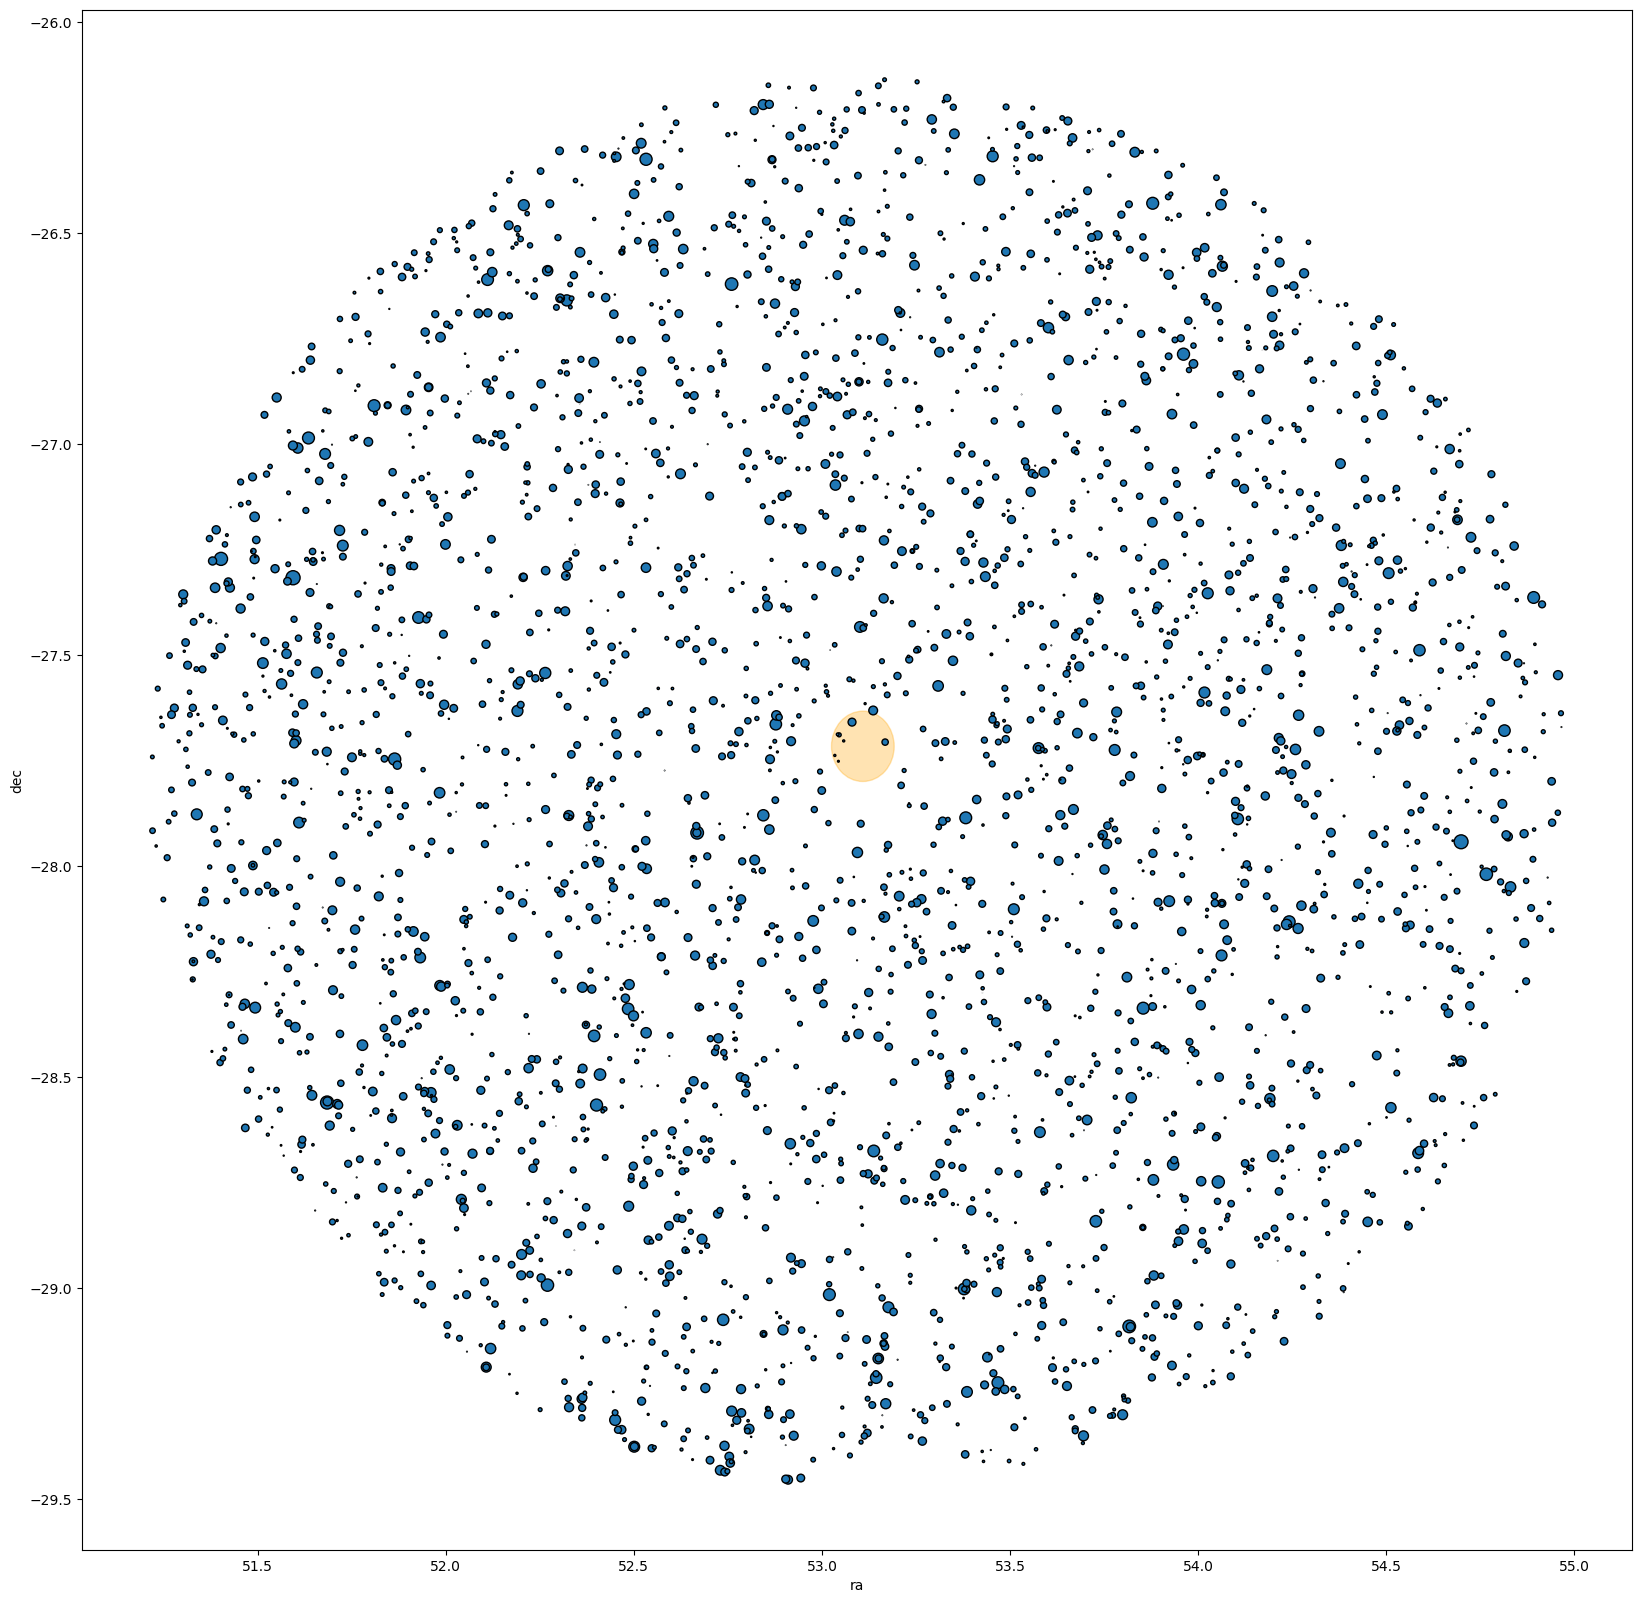

In [6]:
#EQUIRECTANGULAR PROJECTION

FOVra=53.10850525 #ra centre of the FOV
FOVdec= -27.71668243 #dec centre of the FOV

fig, ax = plt.subplots(figsize=(20,20))

FOV = plt.Circle((FOVra,FOVdec), 5/60, color='orange', alpha=0.3)
ax.add_patch(FOV)

plt.scatter(ra,dec,s=scales,edgecolors='black')
plt.xlabel("ra")
plt.ylabel("dec")


# #STEREOGRAPHIC PROJECTION
# def stereographic(ra,dec,ra0,dec0): #Converts ra and dec (in rad) to x and y on a stereographic projection plane around ra0 and dec0
#     delra=(ra-ra0)    
#     d=1 + np.sin(dec0)*np.sin(dec) + np.cos(dec0)*np.cos(dec)*np.cos(delra)
#     y=np.cos(dec0)*np.sin(dec) - np.sin(dec0)*np.cos(dec)*np.cos(delra)
#     x=np.cos(dec)*np.sin(delra)
#     return x/d,y/d

# ra0=53.1 #Projection axis ra value
# dec0=-27.8 #Projection axis dec value

# ra0_rad=np.radians(ra0)
# dec0_rad=np.radians(dec0)

# x=[]
# y=[]
# for i in range(0,len(ra)): #Takes every ra and dec value for the file and turns them into x and y under projection
#     xval,yval=stereographic(np.radians(ra[i]),np.radians(dec[i]),ra0_rad,dec0_rad)
#     x.append(xval)
#     y.append(yval)

# void,radius=stereographic(ra0_rad,dec0_rad+np.radians(5/60),ra0_rad,dec0_rad)

# fig, ax = plt.subplots(figsize=(20,20))
# plt.scatter(x,y,s=scales,edgecolors='black')

# # FOV = plt.Circle((0,0), radius, color='orange', alpha=0.3) 
# # ax.add_patch(FOV)


In [5]:
FOVra=53. #ra centre of the FOV
FOVdec=-27.8 #dec centre of the FOV

fig, ax = plt.subplots(figsize=(20,20))

FOV = plt.Circle((FOVra,FOVdec), 5/60, color='orange', alpha=0.3)
ax.add_patch(FOV)

plt.scatter(ra,dec,s=scales,edgecolors='black')
plt.xlabel("ra")
plt.ylabel("dec")

3207


In [6]:
#GNOMONIC PROJECTION

In [7]:
def gnomonic(ra,dec,ra0,dec0): #Converts ra and dec (in rad) to x and y on a gnomonic projection plane around ra0 and dec0
    c = np.sin(dec0)*np.sin(dec)+np.cos(dec0)*np.cos(dec)*np.cos(ra-ra0)
    
    x=np.cos(dec)*np.sin(ra-ra0)
    y=np.cos(dec0)*np.sin(dec)-np.sin(dec0)*np.cos(dec)*np.cos(ra-ra0)
    
    return x/c,y/c

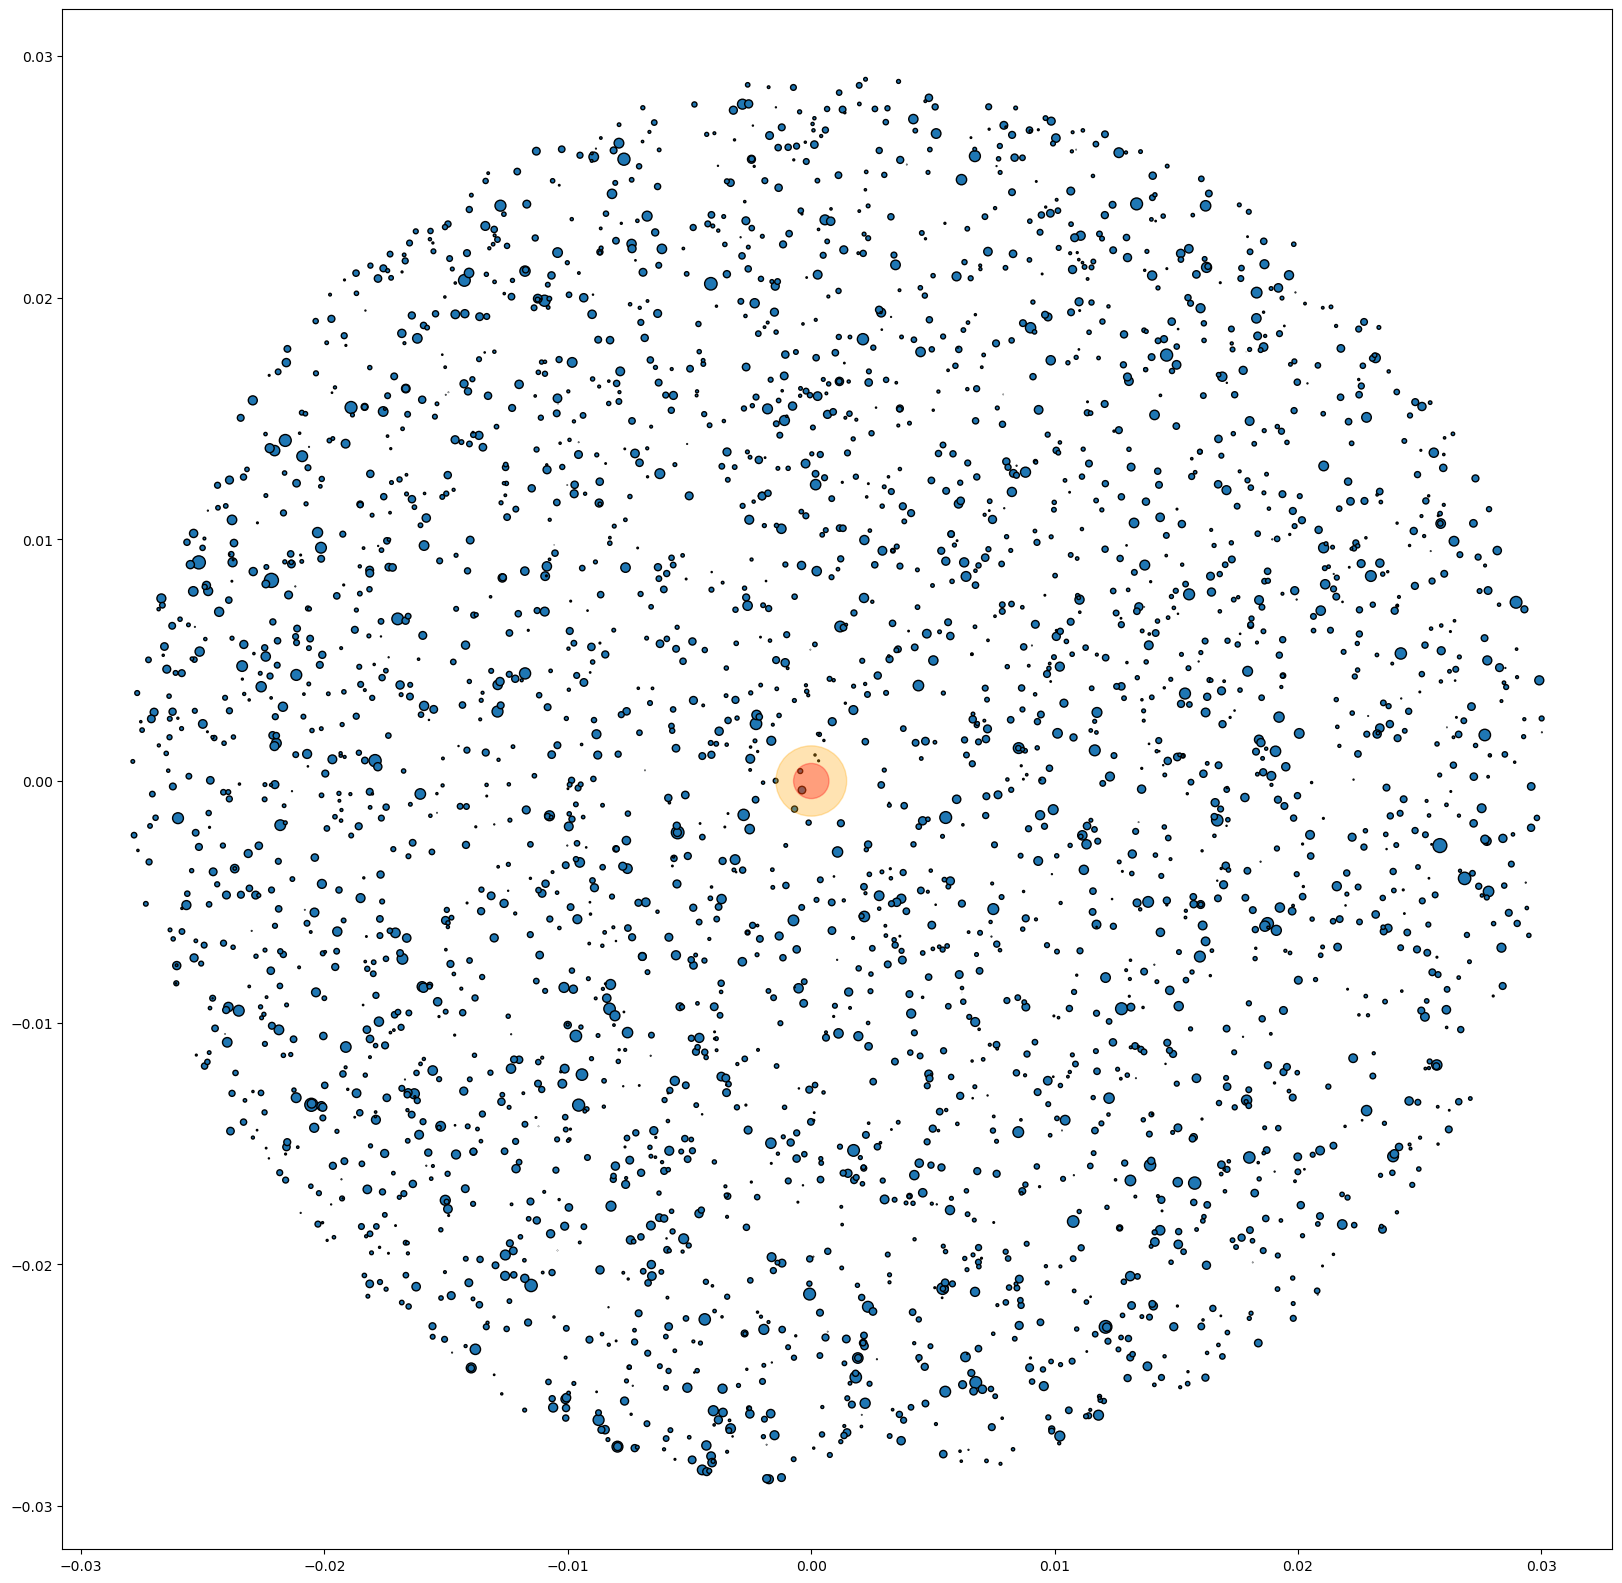

In [25]:
ra0=53.024#Projection axis ra value / centre of FOV
dec0=-27.8 #Projection axis dec value / centre of FOV

ra0_rad=np.radians(ra0) #Turns ra0 into radians
dec0_rad=np.radians(dec0) #Turns dec0 into radians

x=[] #x-coords of stars on gnomonic projection plane
y=[] #y-coords of stars on gnomonic projection plane
for i in range(0,len(ra)): #Takes every ra and dec value for the file and turns them into x and y under projection
    xval,yval=gnomonic(np.radians(ra[i]),np.radians(dec[i]),ra0_rad,dec0_rad) #Angles need to be in radians
    
    x.append(xval)
    y.append(yval)
    

void,FOV_radius=gnomonic(ra0_rad,dec0_rad+np.radians(5/60),ra0_rad,dec0_rad) #Calculates radius of the 10' FOV on the plane

#Plot of stars and FOVs
fig, ax = plt.subplots(figsize=(20,20))
plt.scatter(x,y,s=scales,edgecolors='black')

FOV_techfield = plt.Circle((0,0), FOV_radius, color='orange', alpha=0.3) #Technical field FOV
FOV_sciencefield = plt.Circle((0,0), FOV_radius/2, color='red', alpha=0.3) #Science field FOV
ax.add_patch(FOV_techfield)
ax.add_patch(FOV_sciencefield)


In [26]:
# STARS WITHIN FOV

def distance(x,y): #Distance between FOV centre (0,0) and (x,y):
    d = np.sqrt(x**2+y**2)
    return d

sciencestars_index= [] #Index of stars inside science field
techstars_index = [] #Index of stars inside technical field and not in science field

for i in range(0,len(x)): #Retrieves indexes of stars within the radii.
    if distance(x[i],y[i]) < FOV_radius:
        if distance(x[i],y[i]) < FOV_radius/2:
            sciencestars_index.append(i)
        else:
            techstars_index.append(i)
    

print(len(techstars_index)+len(sciencestars_index))

5


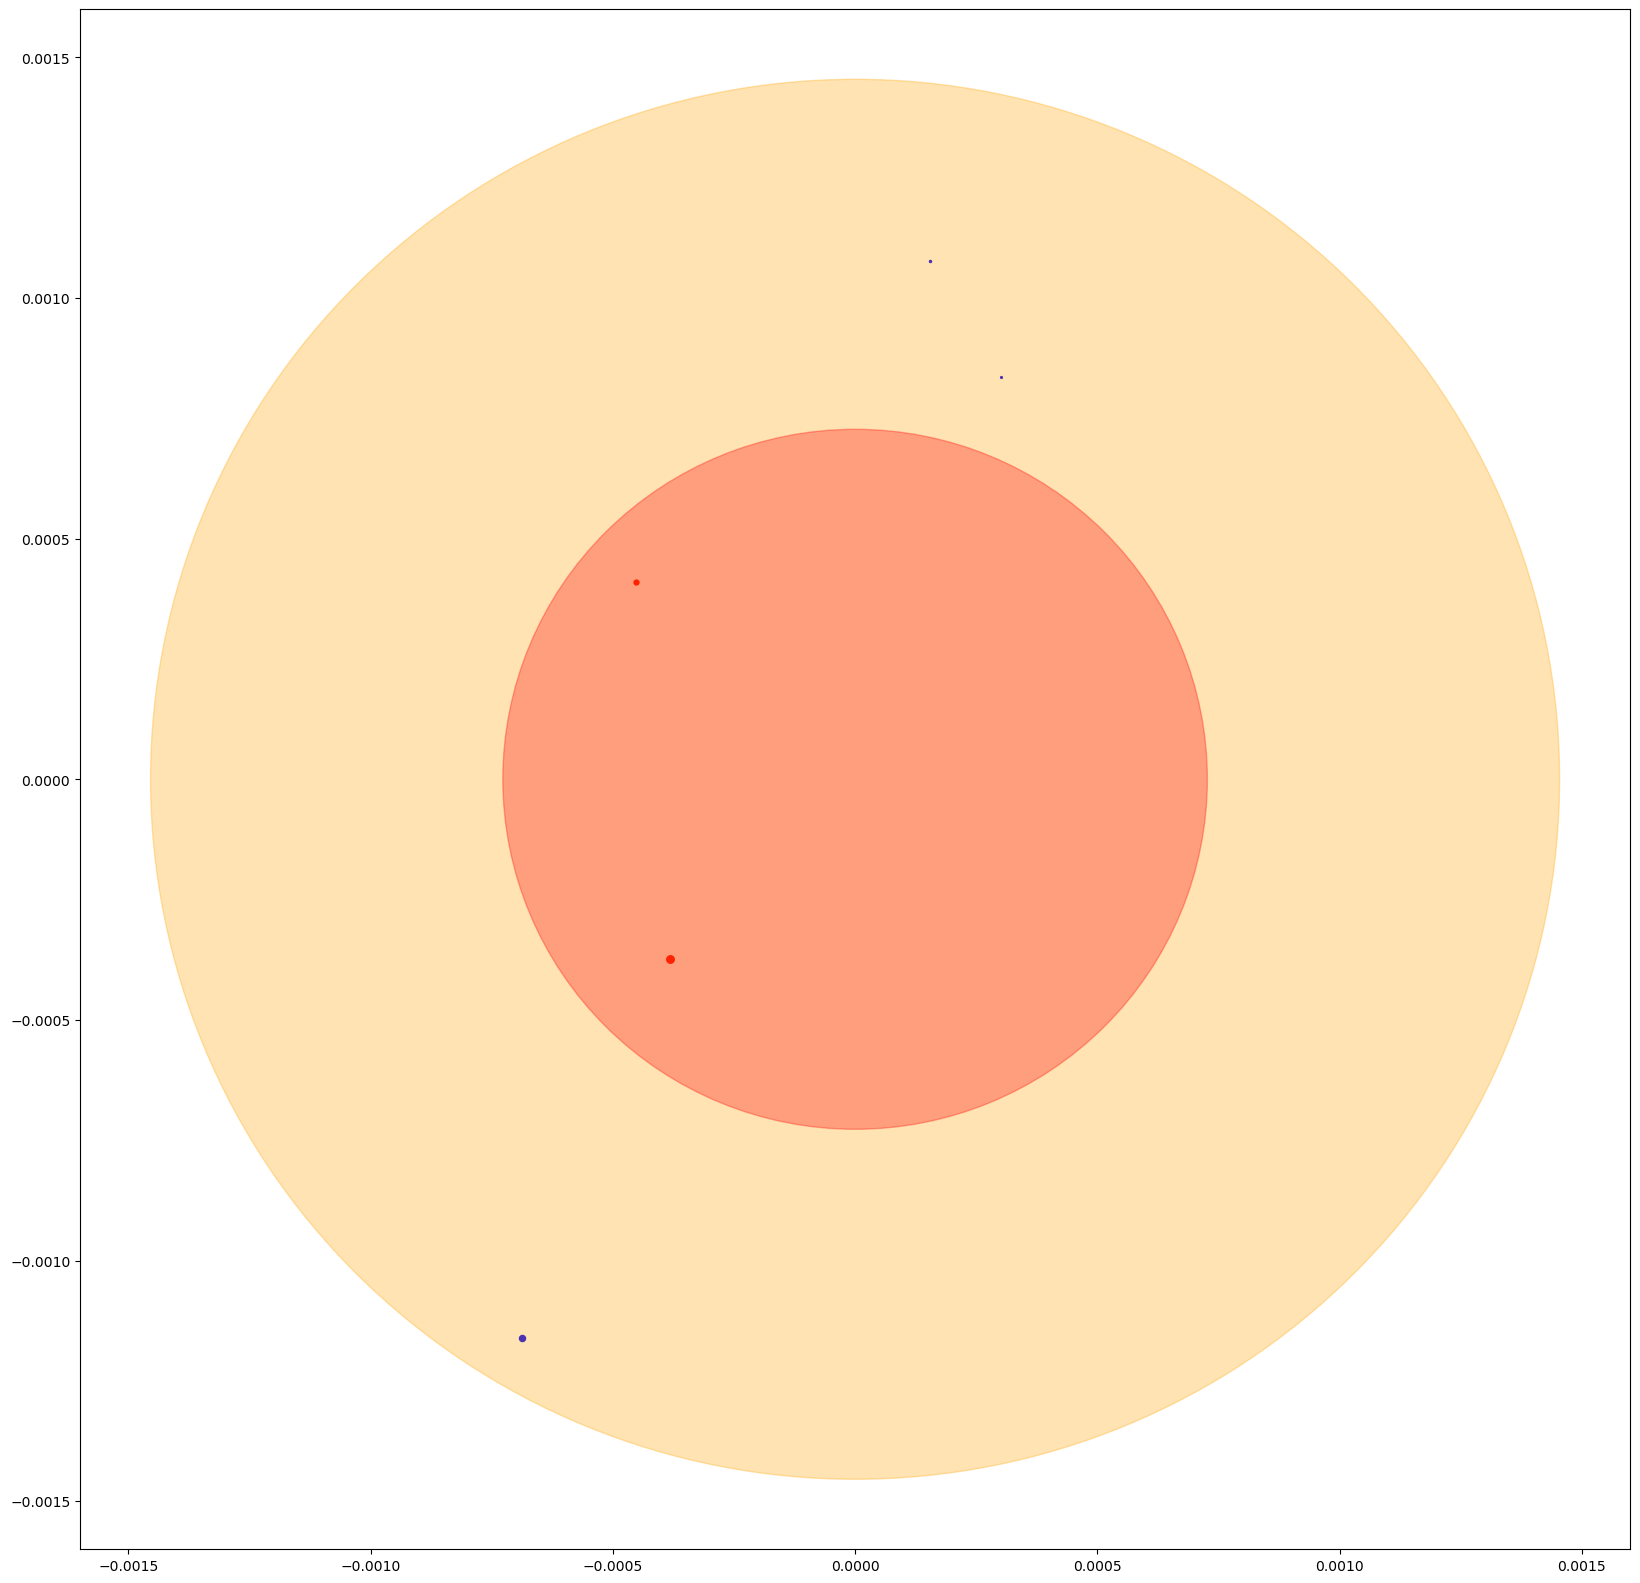

In [27]:
fig, ax = plt.subplots(figsize=(20,20))

for i in techstars_index:
    plt.scatter(x[i],y[i],s=scales[i],color='blue')
for i in sciencestars_index:    
    plt.scatter(x[i],y[i],s=scales[i],color='red')
    
FOV_techfield = plt.Circle((0,0), FOV_radius, color='orange', alpha=0.3) #Technical field FOV
FOV_sciencefield = plt.Circle((0,0), FOV_radius/2, color='red', alpha=0.3) #Science field FOV
ax.add_patch(FOV_techfield)
ax.add_patch(FOV_sciencefield)

In [24]:
# ARM VIGNETTING

#For PFS vignetting, A is top point of the arm, B is rightmost point, C is bottom, D is leftmost.
A=[3,5]
B=[4,4]
C=[3,3]
D=[2,4]

def line(A,B): #Calculates linear equation of a line connecting the two points, y = m*x + b
    m = (A[1]-B[1])/(A[0]-B[0])
    c = A[1] - m * A[0] 
    return m,c

m_AB,c_AB=line(A,B)
m_BC,c_BC=line(B,C)
m_CD,c_CD=line(C,D)
m_DA,c_DA=line(D,A)

star=[3.5,3.5] #Star to be checked for vignetting

#Checks to see if star is within the box (arm shadow)
if star[1] > m_AB * star[0] + c_AB or star[1] < m_BC * star[0] + c_BC or star[1] < m_CD * star[0] + c_CD or star[1] > m_DA * star[0] + c_DA:
    print("Not Vignetted")
    
else: 
    print("Vignetted")

Vignetted
